[markdown記法](https://qiita.com/tbpgr/items/989c6badefff69377da7)

[米国データサイエンティストがやさしく教えるデータサイエンスのためのPython講座](https://www.udemy.com/course/ds_for_python/learn/lecture/21669680#overview)

# Sec.9 CT画像のVisualizationを作る

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
%matplotlib inline

import os
from pathlib import Path

import ctvis

## データのパスをデータフレームにする
#### カラム： FilePathImage, FileName, FilePathMask

In [13]:
df = ctvis.get_df_all()
df

,FilePathImage,FileName,FilePathMask
0,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
1,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
2,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz
3,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
4,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
5,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
8,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz


## NIfTIデータをNumpy Arrayとしてロードする
- np.rollaxis()で軸を変えることができる

In [15]:
sample_path = df['FilePathImage'].iloc[1]
data = ctvis.load_nifti(sample_path)

array([[[-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        ...,
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086]],

       [[-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, 

## マスクデータをRGBにする

In [9]:
index = 1
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

## 元のCTデータをグレースケールに変換する

In [10]:
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
volume_gray = ctvis.hu_to_gray(volume)

## Overlay

In [11]:
overlayed = ctvis.overlay(volume_gray, mask, mask_color, 0.7)

## スライスを一覧で表示する

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


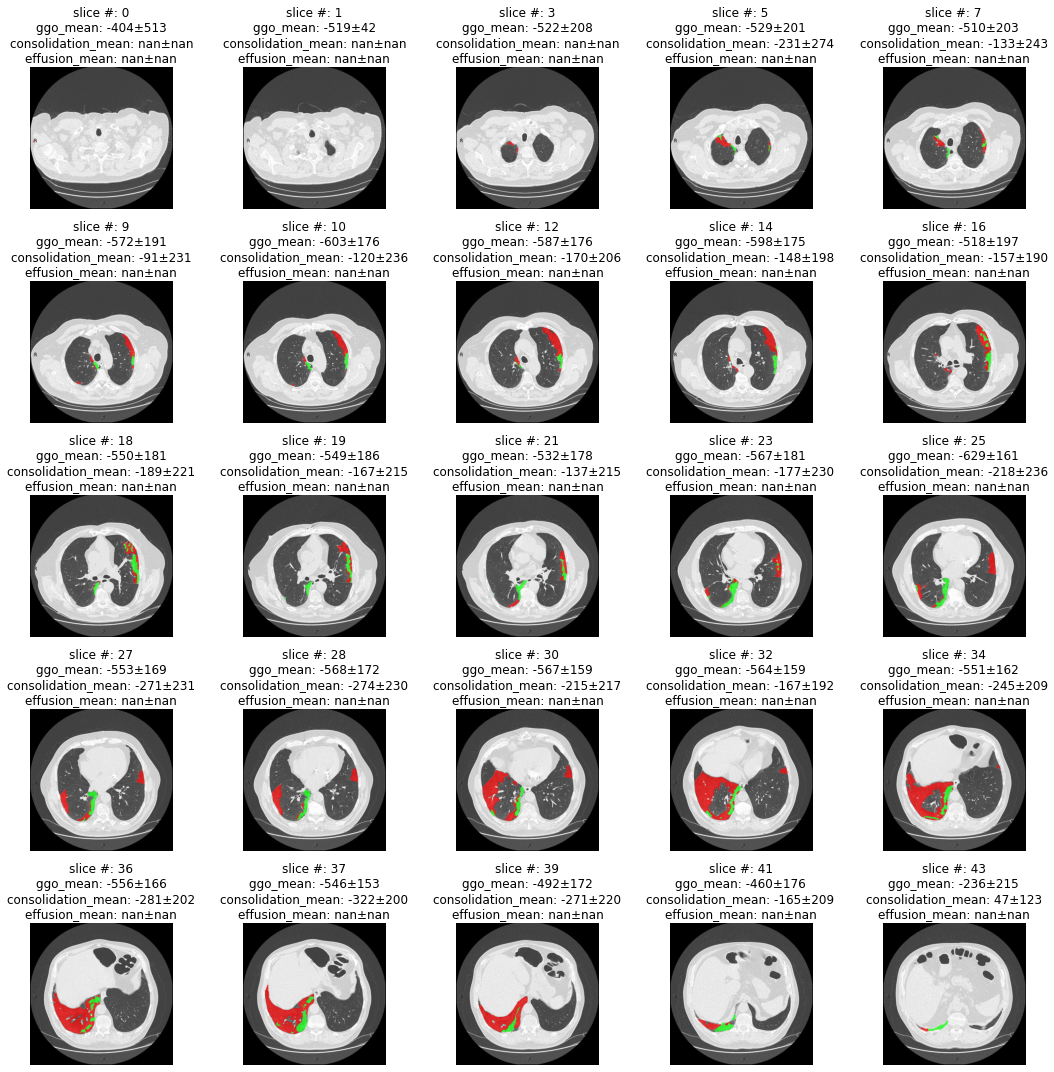

In [12]:
ctvis.vis_overlay(overlayed, volume, mask, cols=5, display_num=25)